In [ ]:
Case study on Supervised learning

Do the following in the iris dataset.
 1.	Read the dataset to the python environment.
 2.	Do necessary pre-processing steps.
 3.	Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read the dataset to the python environment.

In [24]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [26]:
data.shape

(150, 5)

In [27]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


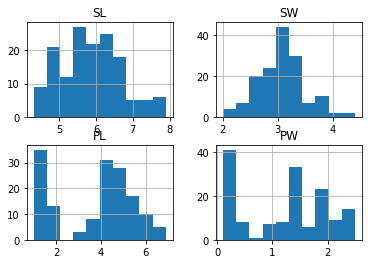

In [88]:
#visualizing the data  

data.hist()
plt.show()

# Do necessary pre-processing steps.

In [ ]:
#Missing value

In [28]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

#Filling missing values

In [29]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [30]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [31]:
print(data.SL.mean())
print(data.SL.median())
print(data.SL.mode())

5.8559440559440565
5.8
0    5.0
dtype: float64


In [16]:
#data['SL'].fillna(data['SL'].median(),inplace=True)

In [32]:
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())
    data.isna().sum()
    


In [33]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [45]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']
#x.head()
print(x.shape)
#y.head()
print(y.shape)


(150, 4)
(150,)


In [ ]:
#Split the dataset into a training set and a testing set

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


# Find out which classification model gives the best result to predict iris

In [ ]:
#Using some of the commonly used algorithms, we will be training our model to check how accurate every algorithm is. We will be implementing these algorithms to compare:

#1 LogisticRegression

#2 K–NearestNeighbour (KNN)

#3 Support Vector Machine (SVM)

#4 Decision Trees

Logistic Regression

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [95]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.89      1.00      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

confusion matrix:
 [[12  0  0]
 [ 0 15  2]
 [ 0  0 16]]
accuracy is 0.9555555555555556


K-Nearest Neighbors 

In [61]:

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.90      0.95        20
Iris-versicolor       0.88      1.00      0.93        21
 Iris-virginica       1.00      0.95      0.97        19

       accuracy                           0.95        60
      macro avg       0.96      0.95      0.95        60
   weighted avg       0.96      0.95      0.95        60

confusion_matrix:
 [[18  2  0]
 [ 0 21  0]
 [ 0  1 18]]
accuracy is 0.95


SVM(Support Vector Machines)

In [58]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.90      0.95        20
Iris-versicolor       0.84      1.00      0.91        21
 Iris-virginica       1.00      0.89      0.94        19

       accuracy                           0.93        60
      macro avg       0.95      0.93      0.93        60
   weighted avg       0.94      0.93      0.93        60

confusion_matrix:
 [[18  2  0]
 [ 0 21  0]
 [ 0  2 17]]
accuracy is 0.9333333333333333


Decision trees

In [60]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

confusion_matrix:
 [[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]
accuracy is 0.9833333333333333


Decision tree model appears a high score of accuracy.

In [90]:
#Test predictions in data input
#input

X_new = np.array([[3, 2, 4, 0.2], [  4.7, 3, 1.3, 0.2 ]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (2, 4)


In [94]:
prediction = classifier.predict(X_new)

#Test result prediction

#Prediction of the species from the input vector
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-versicolor' 'Iris-setosa']


Build model RandomForest 

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [71]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(x_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [72]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.9777777777777777
confusion matrix:
 [[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


In [ ]:
#Feature Importance

In [76]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

PW    0.451359
PL    0.395096
SL    0.105967
SW    0.047578
dtype: float64

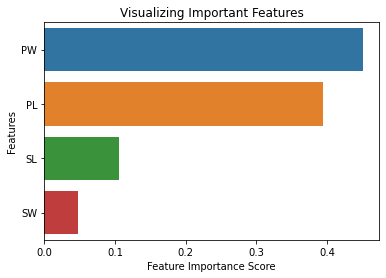

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
#Generating model based on the selected features

#we can remove SW feature bcos it has very low importance,and remaining 3 select for creating model


In [79]:
x=data[['PL','PW','SL']]
y=data['Classification']
#Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(x_test)
clf.fit(x_train,y_train)

# prediction on test set
y_pred=clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.9333333333333333
confusion matrix:
 [[12  0  0]
 [ 0 14  3]
 [ 0  0 16]]
